In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=plt.subplot(111)
    ax.imshow(img,cmap='gray')

In [140]:
charms=cv2.imread('../DATA/reeses_puffs.png',0)
cereals=cv2.imread('../DATA/many_cereals.jpg',0)

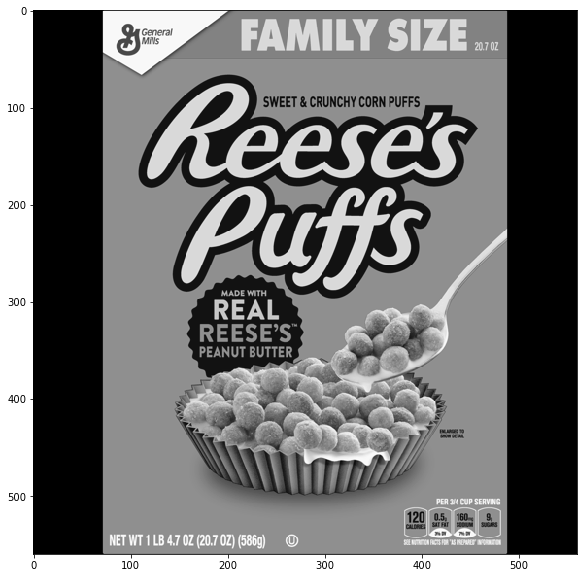

In [141]:
display_img(charms)

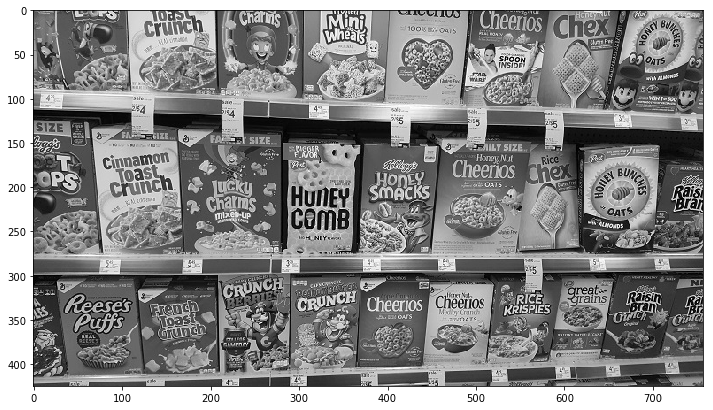

In [142]:
display_img(cereals)

In [143]:
#ORB

In [144]:
orb=cv2.ORB_create()

In [145]:
kp1,des1=orb.detectAndCompute(charms,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [146]:
#1]BRUTEFORCE MATCHER

In [147]:
matcher=cv2.BFMatcher(normType=cv2.NORM_HAMMING)

In [148]:
#using knnMatch to get k no, of matches for each descriptors

In [149]:
matches=matcher.knnMatch(des1,des2,k=2)

In [150]:
matches[0:3]

[[<DMatch 000002884883D110>, <DMatch 000002884883D0F0>],
 [<DMatch 000002884883D290>, <DMatch 000002884883D4B0>],
 [<DMatch 0000028849A432B0>, <DMatch 0000028849A431F0>]]

In [151]:
#RATIO TEST with matchesMask so that we would just mark the indexes with close distances or best matches and give custom color
#instead of creating a new list and adding all the best/close matches too it,

In [152]:
matchesMask=[[0,0] for i in range(len(matches))]

In [153]:
len(matches)

500

In [154]:
#good=[]
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
       #good.append(match1)
        matchesMask[i]=[1,0]

In [155]:
#CONFIGURATION Parametrs for drawMatchesKnn
len(good)

0

In [156]:
draw_params=dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=0)

In [157]:
result=cv2.drawMatchesKnn(charms,kp1,cereals,kp2,matches,None,**draw_params)

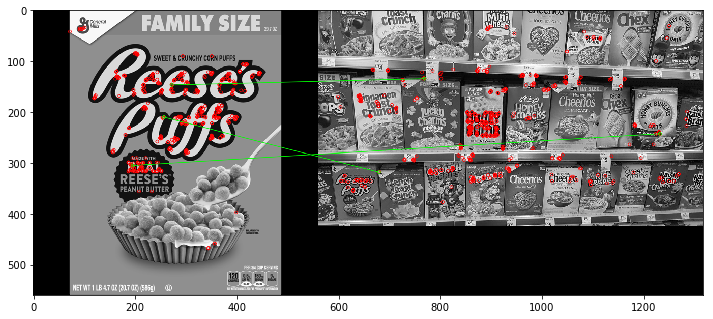

In [158]:
display_img(result)

In [159]:
###FLANN MATCHER WITH ORB DETECTOR

In [160]:
reeses=cv2.imread('../DATA/reeses_puffs.png',0)
cereals=cv2.imread('../DATA/many_cereals.jpg',0)

In [57]:
orb=cv2.ORB_create()

In [58]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [59]:
#FLANN PARAMETERS FOR ORB DETECTOR

In [62]:
FLANN_INDEX_LSH=6
index_params=dict(algorithm = FLANN_INDEX_LSH,
             table_number=6,
             key_size=12,
             multi_probe_level=1)

search_params=dict(checks=50)

In [63]:
#FLANN

In [64]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [65]:
#MATCHING

In [71]:
matches=flann.knnMatch(des1,des2,k=2)
matches[:2]

[[<DMatch 0000028849282250>, <DMatch 00000288492820D0>],
 [<DMatch 0000028849282190>, <DMatch 0000028849282150>]]

In [77]:
good=[]
matchesMask=[[0,0] for i in range(len(matches))]

In [78]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        #good.append([match1])
        matchesMask[i]=[1,0]

In [79]:
draw_params=dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=0)

In [80]:
#result=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
result=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

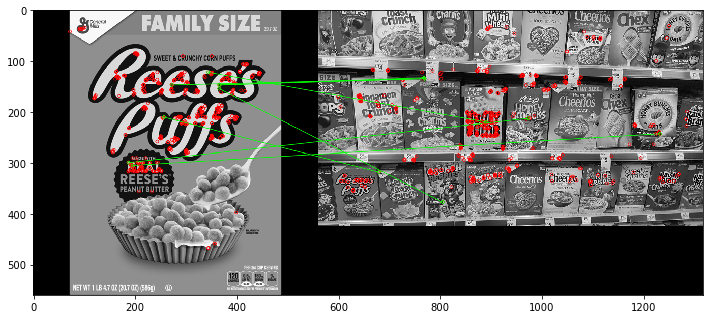

In [81]:
display_img(result)